In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [24]:
def LeerDataset():
    data = pd.read_csv("./output_with_malware_filtered.csv", encoding="utf-8", na_values="?", low_memory=False, on_bad_lines='skip')
    data_cleaned = data.fillna(0)
    data=data_cleaned
    return data

In [25]:
# pd.set_option('future.no_silent_downcasting', True)
data = LeerDataset()
#data.head()


In [26]:
data["Static_analysis.Package name"]
data = data.drop(columns=['Pre_static_analysis.Filename', 
                          'Pre_static_analysis.md5', 
                          'Pre_static_analysis.sha256', 
                          'Pre_static_analysis.sha1'])

In [27]:
filas, columnas = data.shape
print(filas)
print(columnas)

428
24198


In [35]:
df = data
#df = df.loc[:, df.isin([' ','NULL',0]).mean() < .6]

In [29]:
filas, columnas = df.shape
print(filas)
print(columnas)
data = df

428
1035


In [30]:
# Codificación binaria de permisos

import pandas as pd

# Supongamos que tu DataFrame se llama 'df' y la columna se llama 'Static_analysis.Permissions'
# Convierte el string de lista en una lista real
df['Static_analysis.Permissions'] = df['Static_analysis.Permissions'].apply(eval)

# Crea columnas separadas para cada permiso
permissions_dummies = df['Static_analysis.Permissions'].str.join('|').str.get_dummies()

# Combina las columnas nuevas con el DataFrame original
df = pd.concat([df, permissions_dummies], axis=1)

# Ahora puedes eliminar la columna original si ya no la necesitas
df = df.drop(columns=['Static_analysis.Permissions'])

# print(df.head())
data=df

In [31]:
# One-hot encoding Package name

# Utilizando pandas get_dummies para realizar one-hot encoding
package_dummies = pd.get_dummies(data['Static_analysis.Package name'])

# Convertir las columnas booleanas en 0 y 1
package_dummies = package_dummies.astype(int)

# Combinar con el DataFrame original
data = pd.concat([data, package_dummies], axis=1)

# Eliminar la columna original si ya no es necesaria
data = data.drop(columns=['Static_analysis.Package name'])

# print(data.head())
df = data

In [32]:
df

,Static_analysis.Opcodes.const-class,Static_analysis.Opcodes.move-object,Static_analysis.Opcodes.sparse-switch-payload,Static_analysis.Opcodes.return-void,Static_analysis.Opcodes.if-eqz,Static_analysis.Opcodes.invoke-static,Static_analysis.Opcodes.goto/16,Static_analysis.Opcodes.const/4,Static_analysis.Opcodes.sparse-switch,Static_analysis.Opcodes.move-exception,...,tetris.chelle,tgi.bdomtl.uwjkhek.mprmtib.cdjn,thirdnet.mfzone,tkn.ogfad.gpvcj.fkmhbundqj,tp5x.WGt12,u.cbojwn.ooud,vbkoxh.cswnpr,wedplankit.iconosys.eng,xgqkjm.bfveeopo,ynlxcd.cwductjwjc
0,1.0,12.0,1.0,24.0,2.0,12.0,1.0,12.0,1.0,5.0,...,0,0,0,0,0,0,0,0,0,0
1,11.0,110.0,0.0,481.0,329.0,799.0,45.0,991.0,0.0,221.0,...,0,0,0,0,0,0,0,0,0,0
2,81.0,251.0,2.0,481.0,310.0,468.0,84.0,460.0,2.0,66.0,...,0,0,0,0,0,0,0,0,0,0
3,472.0,690.0,18.0,3038.0,2766.0,2816.0,413.0,4451.0,18.0,849.0,...,0,0,0,0,0,0,0,0,0,0
4,48.0,269.0,3.0,552.0,568.0,1344.0,159.0,1183.0,3.0,332.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,15.0,402.0,22.0,0.0,566.0,2034.0,167.0,16.0,43.0,27.0,...,0,0,0,0,0,0,0,0,0,0
424,50.0,142.0,27.0,22.0,544.0,2002.0,35.0,0.0,41.0,13.0,...,0,0,0,0,0,0,0,0,0,0
425,0.0,11.0,0.0,0.0,31.0,105.0,0.0,0.0,3.0,4.0,...,0,0,0,0,0,0,0,0,0,0
426,3.0,19.0,1.0,3.0,152.0,238.0,0.0,0.0,1.0,24.0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# df.drop("Pre_static_analysis.Filename", axis=1)
# copy the data 
df_max_scaled = df.copy() 
  
# apply normalization techniques 
for column in df_max_scaled.columns: 
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max() 
      
# view normalized data 
display(df_max_scaled) 


TypeError: bad operand type for abs(): 'str'

In [9]:
def CargarYprepararDatos(data):
    data['Pre_static_analysis.Filename'] = data['Pre_static_analysis.Filename'].str.split('.').str[0]
    test = data.apply(pd.to_numeric, errors='coerce')
    data = test
    X = data.drop("malware", axis=1)
    y = data["malware"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test


In [10]:
X_train, X_test, y_train, y_test = CargarYprepararDatos(data)

In [11]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-10-03 15:01:42.734967: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-03 15:01:42.750270: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-03 15:01:42.755037: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-03 15:01:42.766935: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-03 15:01:43.683145: W tensorflow/compiler/tf2

In [12]:
def crearModeloML():
    # Crear un modelo simple
    model = Sequential([
        Dense(columnas, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(int(columnas/2), activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])
    
    # Entrenar el modelo
    modelHistory = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
    return model, modelHistory
    

In [13]:
model, modelHistory = crearModeloML()

/home/c7032681/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


2024-10-03 15:01:46.548253: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - AUC: 0.0000e+00 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8843 - loss: nan - val_AUC: 0.0000e+00 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8406 - val_loss: nan
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.0000e+00 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8660 - loss: nan - val_AUC: 0.0000e+00 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8406 - val_loss: nan
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.0000e+00 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8685 - loss: nan - val_AUC: 0.0000e+00 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8406 - val_loss: nan
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.0000e+00 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8713 - loss: nan - val_AUC: 0.0000e+00 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8406

In [14]:
model

<Sequential name=sequential, built=True>

/home/c7032681/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


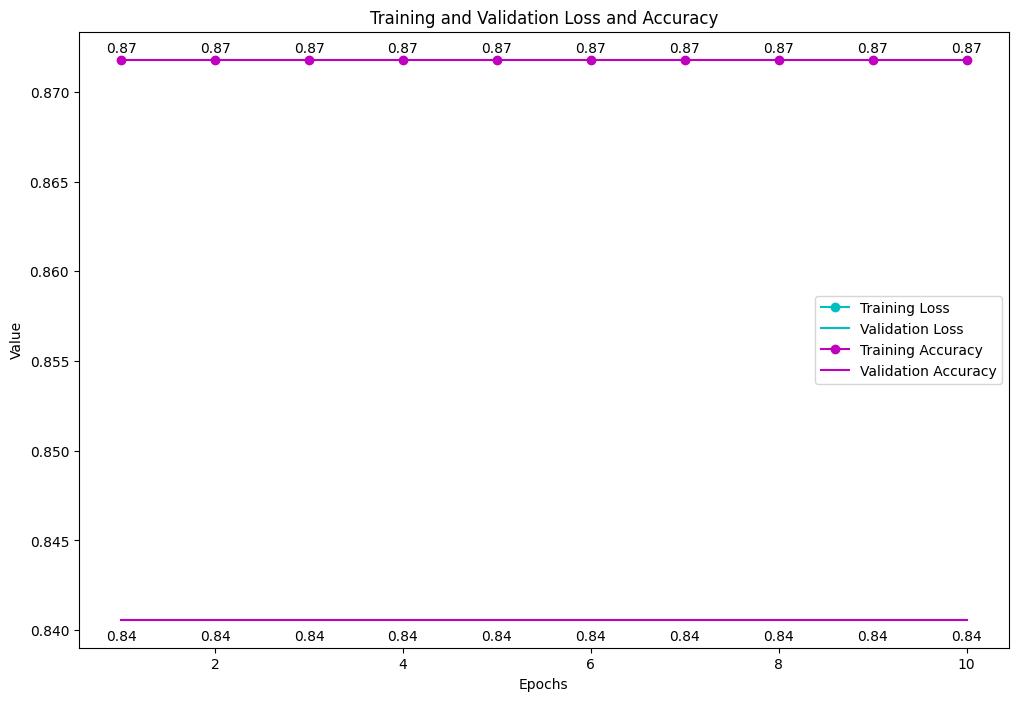

In [15]:
import matplotlib.pyplot as plt
# Obtener los datos del entrenamiento y la validación
history_dict = modelHistory.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Crear una figura
epochs = range(1, len(accuracy) + 1)
plt.figure(figsize=(12, 8))

# Gráfico de Loss
plt.plot(epochs, loss, 'co-', label='Training Loss')
plt.plot(epochs, val_loss, 'c-', label='Validation Loss')

# Añadir anotaciones para Loss
for i, (l, vl) in enumerate(zip(loss, val_loss), 1):
    plt.annotate(f'{l:.2f}', (i, l), textcoords="offset points", xytext=(0, 5), ha='center')
    plt.annotate(f'{vl:.2f}', (i, vl), textcoords="offset points", xytext=(0, -15), ha='center')

# Gráfico de Accuracy en el mismo gráfico
plt.plot(epochs, accuracy, 'mo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'm-', label='Validation Accuracy')

# Añadir anotaciones para Accuracy
for i, (a, va) in enumerate(zip(accuracy, val_accuracy), 1):
    plt.annotate(f'{a:.2f}', (i, a), textcoords="offset points", xytext=(0, 5), ha='center')
    plt.annotate(f'{va:.2f}', (i, va), textcoords="offset points", xytext=(0, -15), ha='center')

# Añadir títulos y etiquetas
plt.title('Training and Validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()

# Mostrar el gráfico
plt.show()

In [12]:
# Obtener los datos del entrenamiento y la validación
history_dict = modelHistory.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
# precision = history_dict['precision']
# val_precision = history_dict['val_precision']
# recall = history_dict['recall']
# val_recall = history_dict['val_recall']
# auc = history_dict['auc']
# val_auc = history_dict['val_auc']

In [13]:

# Obtener el accuracy y loss de entrenamiento y validación
accuracy_train = modelHistory.history['accuracy']
loss_train = modelHistory.history['loss']
accuracy_val = modelHistory.history['val_accuracy']
loss_val = modelHistory.history['val_loss']

# Calcular el promedio del accuracy y loss
avg_accuracy_train = sum(accuracy_train) / len(accuracy_train)
avg_loss_train = sum(loss_train) / len(loss_train)
avg_accuracy_val = sum(accuracy_val) / len(accuracy_val)
avg_loss_val = sum(loss_val) / len(loss_val)

print("Promedio de Accuracy (entrenamiento):", avg_accuracy_train)
print("Promedio de Loss (entrenamiento):", avg_loss_train)
print("Promedio de Accuracy (validación):", avg_accuracy_val)
print("Promedio de Loss (validación):", avg_loss_val)

Promedio de Accuracy (entrenamiento): 0.9849303662776947
Promedio de Loss (entrenamiento): 0.044900264404714105
Promedio de Accuracy (validación): 0.9843723952770234
Promedio de Loss (validación): 0.05147432424128055


# FGSM

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [15]:

# Implementar FGSM
def fgsm_attack(model, loss_object, image, label, epsilon):
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = loss_object(label, prediction)
    
    gradient = tape.gradient(loss, image)
    signed_grad = tf.sign(gradient)
    adversarial_image = image + epsilon * signed_grad
    adversarial_image = tf.clip_by_value(adversarial_image, 0, 1)
    
    return adversarial_image


# Configurar la pérdida
loss_object = tf.keras.losses.BinaryCrossentropy()

# Seleccionar una muestra del conjunto de prueba para el ataque adversario
sample_index = 3
sample_image = tf.convert_to_tensor([X_test.iloc[sample_index]], dtype=tf.float32)
sample_label = tf.convert_to_tensor([y_test.iloc[sample_index]], dtype=tf.float32)

# Realizar el ataque FGSM
epsilon = 0.1
adversarial_image = fgsm_attack(model, loss_object, sample_image, sample_label, epsilon)

# Evaluar la imagen adversaria
pred_original = model.predict(sample_image)
pred_adversarial = model.predict(adversarial_image)

print("Predicción original:", pred_original)
print("Predicción adversaria:", pred_adversarial)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicción original: [[0.9976271]]
Predicción adversaria: [[1.16301406e-10]]


/home/b7032681/.local/lib/python3.10/site-packages/tensorflow/python/framework/constant_op.py:108: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return ops.EagerTensor(value, ctx.device_name, dtype)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

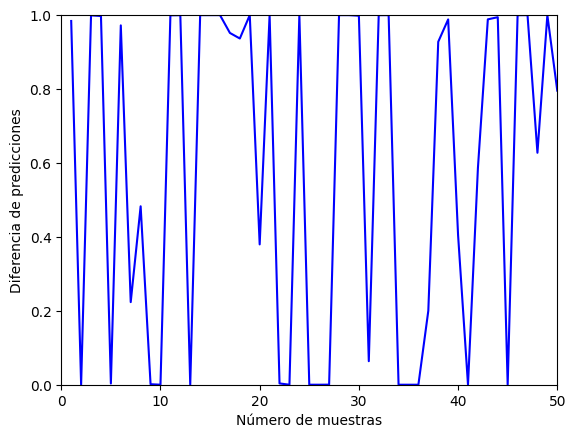

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Configurar la pérdida
loss_object = tf.keras.losses.BinaryCrossentropy()

# Parámetro de perturbación
epsilon = 0.1

# Variables para almacenar resultados
original_predictions = []
adversarial_predictions = []

# Generar y evaluar 1000 muestras adversarias
num_samples = 50

# Configurar la gráfica
plt.ion()  # Modo interactivo
fig, ax = plt.subplots()
x_data = []
y_data = []

line, = ax.plot(x_data, y_data, 'b-')
ax.set_xlim(0, num_samples)
ax.set_ylim(0, 1)  # Ajusta según la escala de las predicciones
ax.set_xlabel('Número de muestras')
ax.set_ylabel('Diferencia de predicciones')

for i in range(num_samples):
    sample_image = tf.convert_to_tensor([X_test.iloc[i]], dtype=tf.float32)
    sample_label = tf.convert_to_tensor([y_test.iloc[i]], dtype=tf.float32)
    
    adversarial_image = fgsm_attack(model, loss_object, sample_image, sample_label, epsilon)
    
    pred_original = model.predict(sample_image)
    pred_adversarial = model.predict(adversarial_image)
    
    original_predictions.append(pred_original)
    adversarial_predictions.append(pred_adversarial)
    
    # Calcula la diferencia entre las predicciones originales y adversarias
    diff = np.abs(pred_original - pred_adversarial).mean()
    
    # Actualiza los datos de la gráfica
    x_data.append(i + 1)
    y_data.append(diff)
    line.set_xdata(x_data)
    line.set_ydata(y_data)
    
    # Redibuja la gráfica
    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw()
    fig.canvas.flush_events()
    
    # Print opcional para debug
    # print(f"Muestra {i+1}/{num_samples}")
    # print("Predicción original:", pred_original)
    # print("Predicción adversaria:", pred_adversarial)

# Convertir los resultados a arrays numpy para análisis posterior
original_predictions = np.array(original_predictions)
adversarial_predictions = np.array(adversarial_predictions)

# Aquí puedes agregar código para analizar los resultados


Pérdida original: 0.005992547
Pérdida adversaria: 6.202716
Accuracy original: 1.0
Accuracy adversaria: 0.42


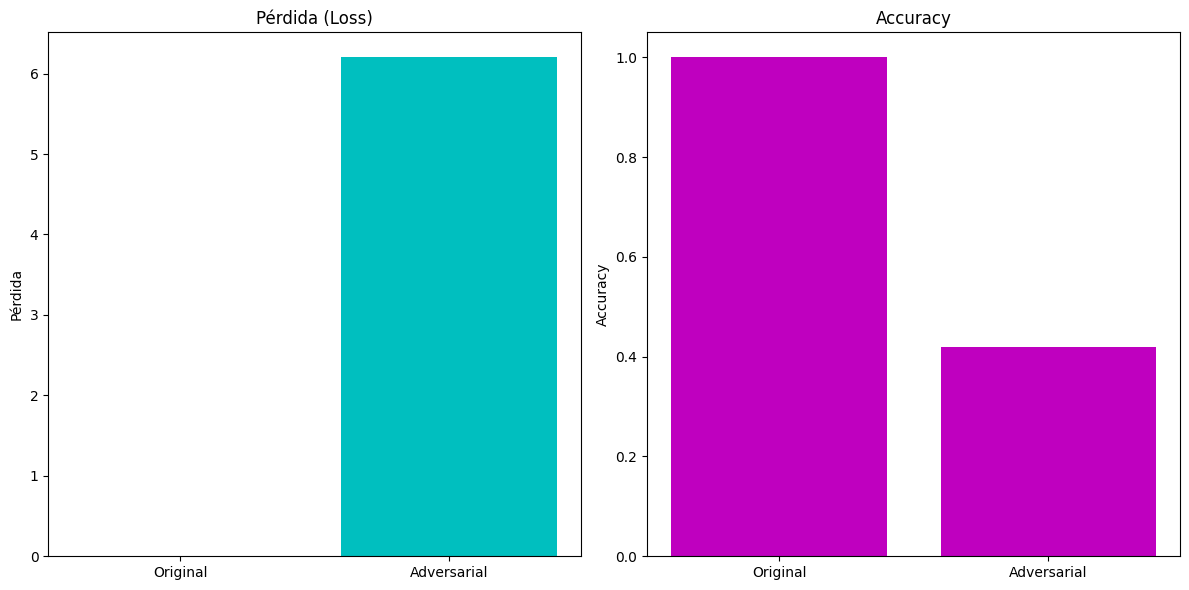

In [17]:
# Convertir los resultados a arrays numpy para análisis posterior
original_predictions = np.array(original_predictions).flatten()
adversarial_predictions = np.array(adversarial_predictions).flatten()

# Calcular la pérdida y el accuracy para las predicciones originales y adversarias
y_test_sampled = y_test.iloc[:num_samples].values

loss_original = loss_object(y_test_sampled, original_predictions).numpy()
loss_adversarial = loss_object(y_test_sampled, adversarial_predictions).numpy()

accuracy_original = np.mean((original_predictions > 0.5).astype(int) == y_test_sampled)
accuracy_adversarial = np.mean((adversarial_predictions > 0.5).astype(int) == y_test_sampled)

print("Pérdida original:", loss_original)
print("Pérdida adversaria:", loss_adversarial)
print("Accuracy original:", accuracy_original)
print("Accuracy adversaria:", accuracy_adversarial)

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Pérdida
plt.subplot(1, 2, 1)
plt.bar(['Original', 'Adversarial'], [loss_original, loss_adversarial], color="c")
plt.title('Pérdida (Loss)')
plt.ylabel('Pérdida')

# Accuracy
plt.subplot(1, 2, 2)
plt.bar(['Original', 'Adversarial'], [accuracy_original, accuracy_adversarial], color="m")
plt.title('Accuracy')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

Pérdida original: 0.00060675084
Pérdida adversaria: 5.783401
Accuracy original: 1.0
Accuracy adversaria: 0.4
F1 Score original: 1.0
F1 Score adversaria: 0.0625


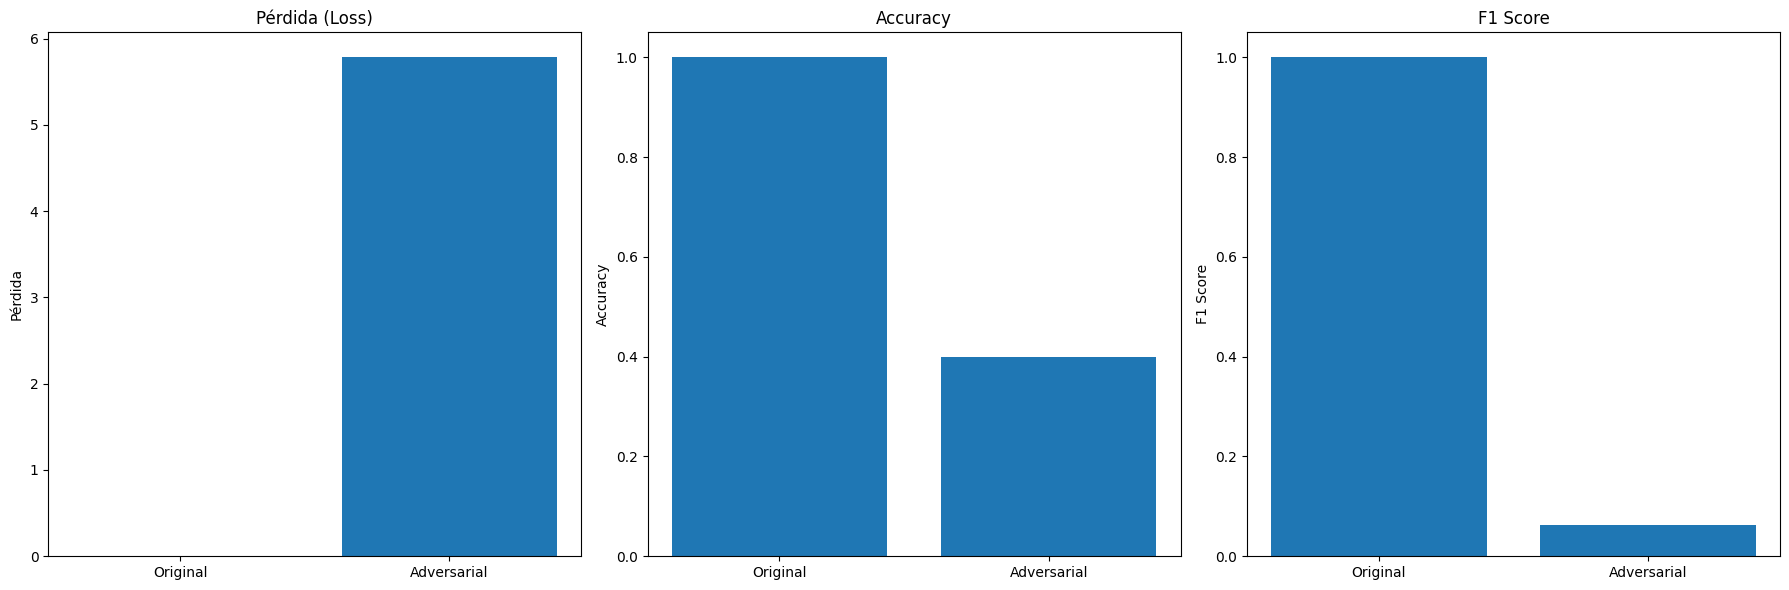

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Convertir los resultados a arrays numpy para análisis posterior
original_predictions = np.array(original_predictions).flatten()
adversarial_predictions = np.array(adversarial_predictions).flatten()

# Calcular la pérdida y el accuracy para las predicciones originales y adversarias
y_test_sampled = y_test.iloc[:num_samples].values

loss_original = loss_object(y_test_sampled, original_predictions).numpy()
loss_adversarial = loss_object(y_test_sampled, adversarial_predictions).numpy()

accuracy_original = np.mean((original_predictions > 0.5).astype(int) == y_test_sampled)
accuracy_adversarial = np.mean((adversarial_predictions > 0.5).astype(int) == y_test_sampled)

# Calcular el F1 Score
f1_original = f1_score(y_test_sampled, (original_predictions > 0.5).astype(int))
f1_adversarial = f1_score(y_test_sampled, (adversarial_predictions > 0.5).astype(int))

print("Pérdida original:", loss_original)
print("Pérdida adversaria:", loss_adversarial)
print("Accuracy original:", accuracy_original)
print("Accuracy adversaria:", accuracy_adversarial)
print("F1 Score original:", f1_original)
print("F1 Score adversaria:", f1_adversarial)

# Graficar los resultados
plt.figure(figsize=(18, 6))

# Pérdida
plt.subplot(1, 3, 1)
plt.bar(['Original', 'Adversarial'], [loss_original, loss_adversarial])
plt.title('Pérdida (Loss)')
plt.ylabel('Pérdida')

# Accuracy
plt.subplot(1, 3, 2)
plt.bar(['Original', 'Adversarial'], [accuracy_original, accuracy_adversarial])
plt.title('Accuracy')
plt.ylabel('Accuracy')

# F1 Score
plt.subplot(1, 3, 3)
plt.bar(['Original', 'Adversarial'], [f1_original, f1_adversarial])
plt.title('F1 Score')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()